In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('realestate.csv')
print(data)
X=data.values[:, 3:6]
Y=data.values[:, 2]

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

In [6]:
#y = pd.get_dummies(y).values
#y[:3]
print(X)
print(Y)

[[3 1.0 1180]
 [3 2.25 2570]
 [2 1.0 770]
 ...
 [2 0.75 1020]
 [3 2.5 1600]
 [2 0.75 1020]]
[221900.0 538000.0 180000.0 ... 402101.0 400000.0 325000.0]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=20, random_state=4)

In [9]:
learning_rate = 0.1
iterations = 5000
N = y_train.size
input_size = 4
hidden_size = 2 
output_size = 3  
results = pd.DataFrame(columns=["mse", "accuracy"])

In [10]:
np.random.seed(10)
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [12]:
for itr in range(iterations):    
    
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

ValueError: shapes (21593,3) and (4,2) not aligned: 3 (dim 1) != 4 (dim 0)

<AxesSubplot:title={'center':'Mean Squared Error'}>

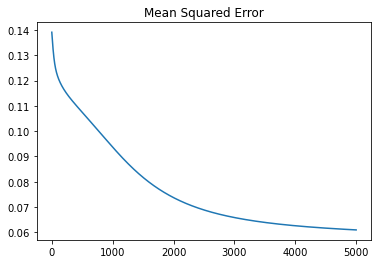

In [10]:
results.mse.plot(title="Mean Squared Error")

<AxesSubplot:title={'center':'Accuracy'}>

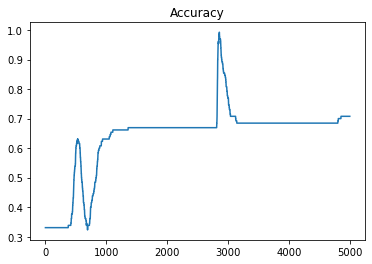

In [11]:
results.accuracy.plot(title="Accuracy")

In [13]:
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.8
